In [10]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\HP\Downloads\movies.csv')



In [106]:
# Now let's take a look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [12]:
# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [21]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [32]:
#convert decemials and make data clean

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)
df['votes'] = df['votes'].fillna(0)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [135]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [34]:
#create a new column for year

df['yearcorrect'] = df ['released'].astype(str).str[:4]

In [136]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [137]:
#Checking for the height grossing movie

df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [39]:

pd.set_option('display.max_rows', None)

In [138]:
#Removing duplicate
#Showing distinctive values

df['company'].drop_duplicates().sort_values(ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [139]:
df['company'].drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [140]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [47]:
#Budget is going high correlation
# Company will have a correlation


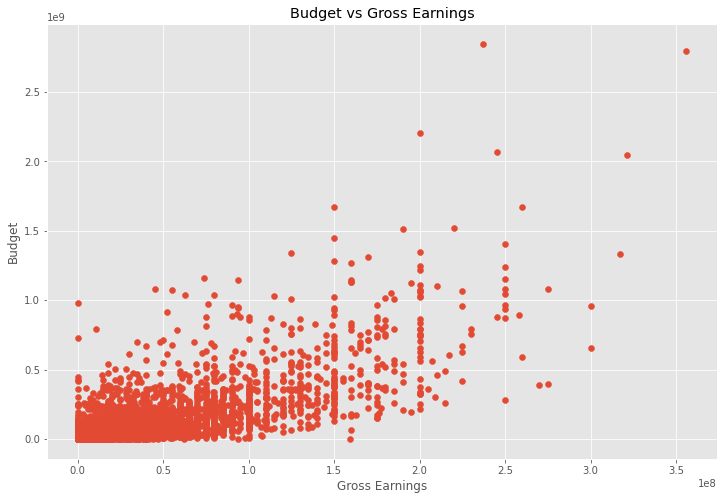

In [55]:
import matplotlib.pyplot as plt

# Scatter plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')

plt.show()


In [50]:
df=df.sort_values(by=['gross'], inplace=False, ascending=False)

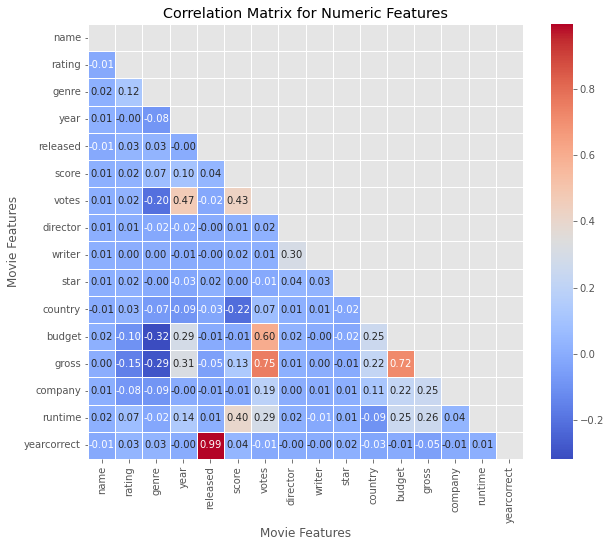

In [146]:
import numpy as np

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=.5)

# Add title and labels
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

# Show plot
plt.show()


In [51]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


<AxesSubplot:xlabel='budget', ylabel='gross'>

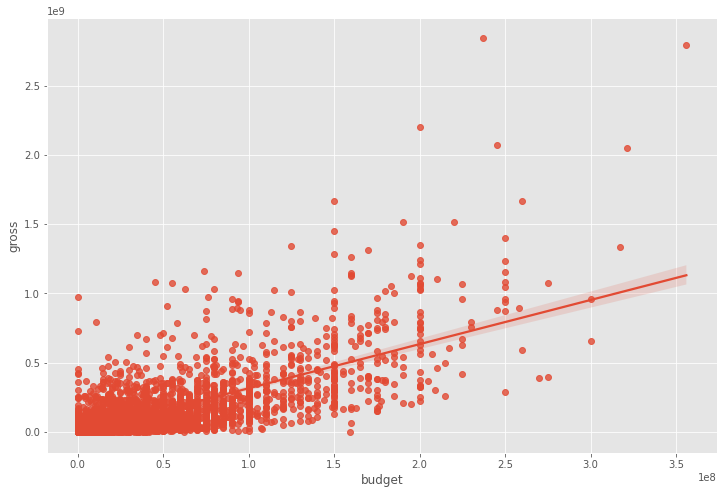

In [57]:
#plot budget vs gross

sns.regplot(x='budget', y='gross',data=df)

<AxesSubplot:xlabel='budget', ylabel='gross'>

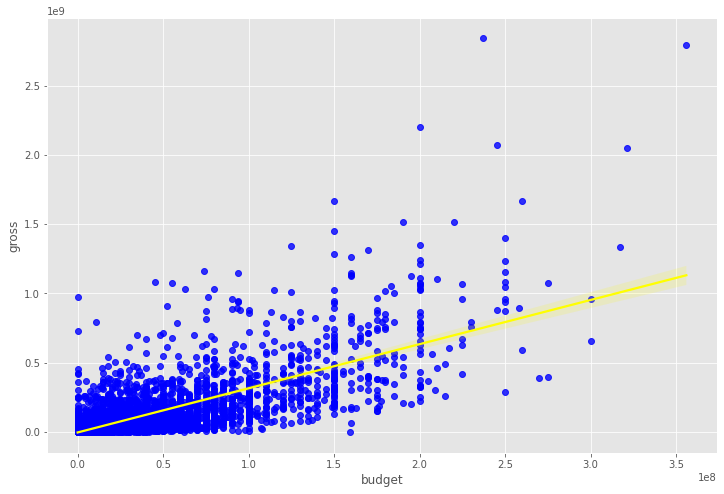

In [63]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "blue"}, line_kws={"color":"yellow"})


In [64]:
#Lets find the correleration

#Kandal and spareman

In [70]:
#pearson
df.corr('pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


In [66]:
df.corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.330410,0.209304,0.216595,0.097184
score,0.067652,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.330410,0.300115,1.000000,0.439883,0.560449,0.197948
budget,0.209304,-0.005194,0.439883,1.000000,0.541956,0.176016
gross,0.216595,0.090626,0.560449,0.541956,1.000000,0.176912
runtime,0.097184,0.283611,0.197948,0.176016,0.176912,1.000000


In [67]:
# looking at the cell corresponding to "votes" and "gross", we see a correlation coefficient of approximately 0.560449, indicating a moderate positive correlation between the number of votes and the gross earnings of the movies in the dataset. Similarly, a coefficient of approximately 0.300115 between "score" and "votes" suggests a weak positive correlation between movie ratings and the number of votes received.

In [68]:
df.corr(method='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.468107,0.291152,0.314681,0.142977
score,0.099045,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.468107,0.428138,1.000000,0.604693,0.752550,0.289726
budget,0.291152,-0.007500,0.604693,1.000000,0.716816,0.246748
gross,0.314681,0.132569,0.752550,0.716816,1.000000,0.256783
runtime,0.142977,0.399857,0.289726,0.246748,0.256783,1.000000


In [69]:
#High correclation btw budget and growth

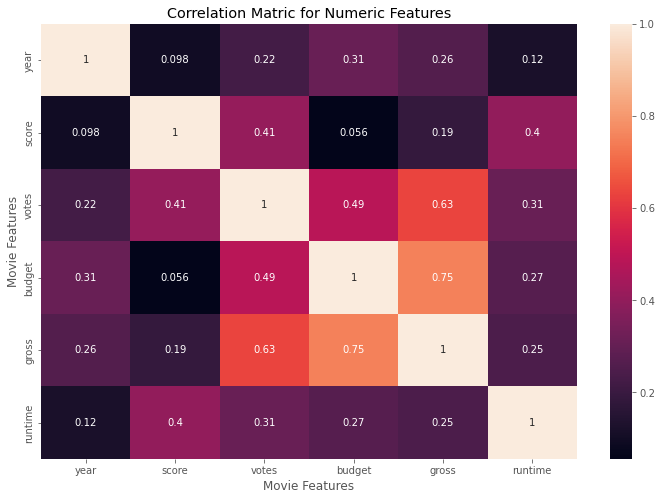

In [74]:
correlation_metrix = df.corr('pearson')

sns.heatmap(correlation_metrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

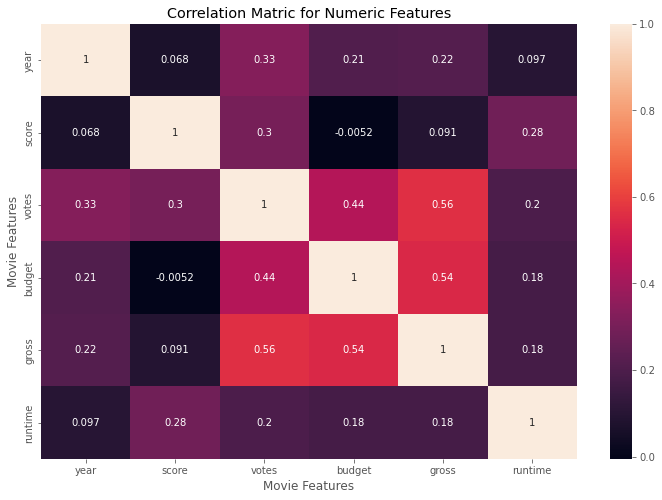

In [75]:
correlation_metrix = df.corr(method='kendall')

sns.heatmap(correlation_metrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

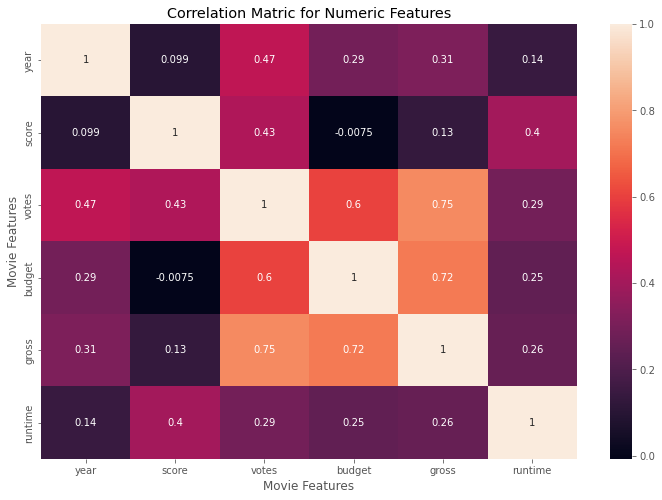

In [76]:
correlation_metrix = df.corr(method='spearman')

sns.heatmap(correlation_metrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

#black shows low correlation bright colurs shows high collelation

In [77]:
# Lets look at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,Dece
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,Apri
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,Dece
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,Dece
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,Apri


In [78]:
#Converting String to Numeric

In [144]:
# Create a copy of the original DataFrame
df_numerized = df.copy()

# Iterate through each column
for col_name in df_numerized.columns:
    # Check if the column dtype is 'object'
    if df_numerized[col_name].dtype == 'object':
        # Convert the column to 'category' dtype
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        # Encode the categories with numerical codes
        df_numerized[col_name] = df_numerized[col_name].cat.codes

# Display the modified DataFrame
df_numerized.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


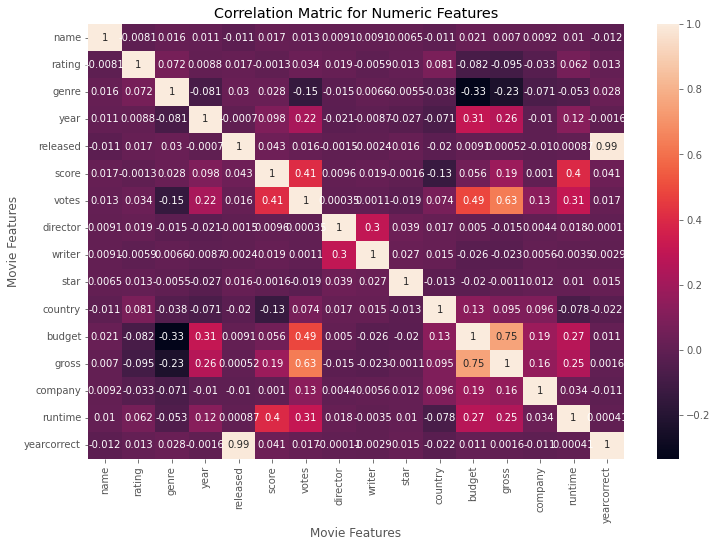

In [125]:
correlation_metrix = df_numerized.corr('pearson')

sns.heatmap(correlation_metrix, annot=True)

plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

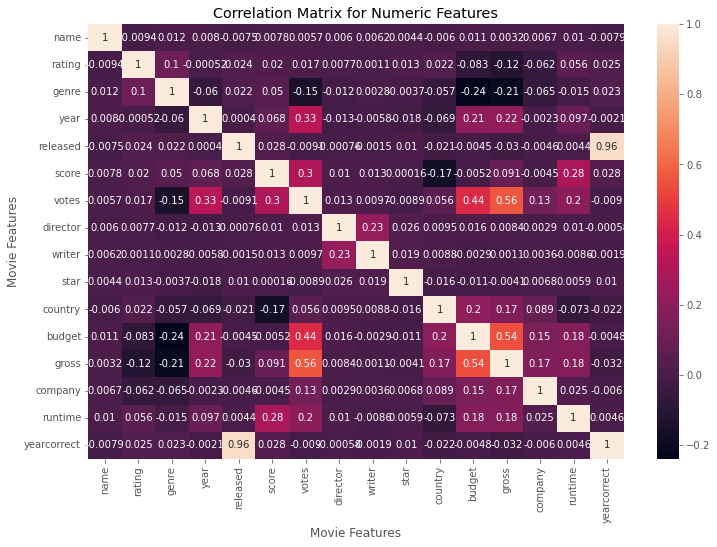

In [127]:
correlation_matrix = df_numerized.corr(method='kendall')

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

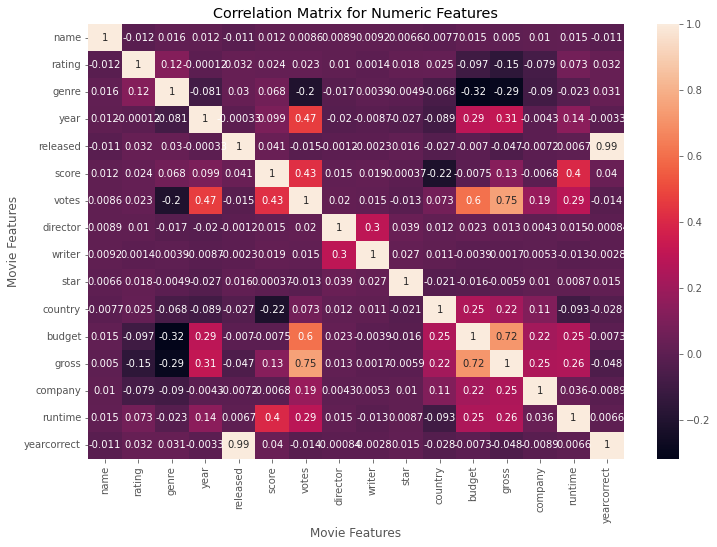

In [128]:
correlation_matrix = df_numerized.corr(method='spearman')

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [145]:
df_numerized.corr()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162.0,10
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181.0,8
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194.0,10
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138.0,10
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149.0,8


In [131]:
#Unstacking
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013038
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020548
             gross          0.006989
             company        0.009211
             runtime        0.010392
             yearcorrect   -0.011725
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033743
             director       0.019483
             writer        -0.005921
             star           0.013405
             country        0.081244
 

In [133]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

genre        budget        -0.334021
budget       genre         -0.334021
genre        gross         -0.234297
gross        genre         -0.234297
genre        votes         -0.145296
votes        genre         -0.145296
score        country       -0.133348
country      score         -0.133348
gross        rating        -0.095450
rating       gross         -0.095450
             budget        -0.081939
budget       rating        -0.081939
genre        year          -0.081261
year         genre         -0.081261
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
year         country       -0.070938
country      year          -0.070938
genre        runtime       -0.052711
runtime      genre         -0.052711
genre        country       -0.037615
country      genre         -0.037615
rating       company       -0.032943
company      rating        -0.032943
year         star          -0.027242
s

In [134]:
#Viewing just high correlations

high_corr = sorted_pairs [(sorted_pairs)>0.5]

high_corr

votes        gross          0.632870
gross        votes          0.632870
             budget         0.750157
budget       gross          0.750157
released     yearcorrect    0.993694
yearcorrect  released       0.993694
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
#votes and budget has the heighest correlation to gross earnings
#Company has no correlation.

